Accuracy (K-Nearest Neighbors): 0.6584566701012705
F1-score (K-Nearest Neighbors): 0.7287846627867169
Recall (K-Nearest Neighbors): 0.7645271580640991
Confusion Matrix (K-Nearest Neighbors):
[[ 46292  46439]
 [ 32783 106439]]
Classification Report (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.59      0.50      0.54     92731
           1       0.70      0.76      0.73    139222

    accuracy                           0.66    231953
   macro avg       0.64      0.63      0.63    231953
weighted avg       0.65      0.66      0.65    231953



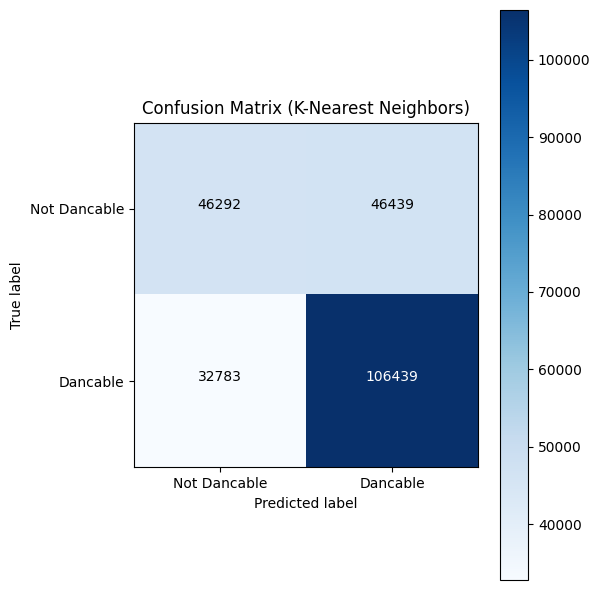

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score
import matplotlib.pyplot as plt

spotify_df = pd.read_csv('../spotify_data.csv')
selected_features = ['energy', 'loudness', 'liveness', 'instrumentalness', 'danceability']
spotify_df = spotify_df[selected_features]

# Normalise the data using Min-Max scaling
scaler = MinMaxScaler()
spotify_df[selected_features[:-1]] = scaler.fit_transform(spotify_df[selected_features[:-1]])

# Split data into training and testing sets
X = spotify_df[selected_features[:-1]]
y = spotify_df['danceability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Perform train-test split

# Convert labels to binary classification (0 or 1) based on threshold
threshold = 0.5
y_train_binary = np.where(y_train > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)

# Initialize K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train_binary)

# Predict on test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate model
accuracy_knn = accuracy_score(y_test_binary, y_pred_knn)
f1_knn = f1_score(y_test_binary, y_pred_knn)
recall_knn = recall_score(y_test_binary, y_pred_knn)

# Print metrics
print(f"Accuracy (K-Nearest Neighbors): {accuracy_knn}")
print(f"F1-score (K-Nearest Neighbors): {f1_knn}")
print(f"Recall (K-Nearest Neighbors): {recall_knn}")

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test_binary, y_pred_knn)
print(f"Confusion Matrix (K-Nearest Neighbors):\n{conf_matrix_knn}")

# Classification Report
class_report_knn = classification_report(y_test_binary, y_pred_knn)
print(f"Classification Report (K-Nearest Neighbors):\n{class_report_knn}")

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (K-Nearest Neighbors)')
plt.colorbar()

classes = ['Not Dancable', 'Dancable']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = conf_matrix_knn.max() / 2
for i in range(conf_matrix_knn.shape[0]):
    for j in range(conf_matrix_knn.shape[1]):
        plt.text(j, i, format(conf_matrix_knn[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_knn[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()